In [2]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import matplotlib as mpl

In [3]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [4]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_BS0.4/lvl4/output', 50, combineFiles=True)
sn0 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 0, combineFiles=True)

In [7]:
center = sn.part1.pos.value[np.argmin(sn.part1.pot.value)]

In [11]:
pos = sn.part2.pos.value - center
vel = sn.part2.vel.value
acc = sn.part2.acce

R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

In [15]:
accR = np.cos(phi) * acc[:,0] + np.sin(phi) * acc[:,1]
vcsq = - R * accR
vc = np.sqrt(vcsq)

<ipython-input-15-b5e439746ef6>:3: RuntimeWarning: invalid value encountered in sqrt
  vc = np.sqrt(vcsq)


In [19]:
Rmax = 2.
Rmin = 0.0
dR = 0.02

Rlist = []
vclist = []

while Rmin < Rmax:
    key = np.logical_and(R>Rmin, R<Rmin+dR)
    Rlist.append(np.mean(R[key]))
    vclist.append(np.mean(vc[key]))

    Rmin += dR

Rlist = np.array(Rlist)
vclist = np.array(vclist)
    

Text(0, 0.5, '<vc> [km/s]')

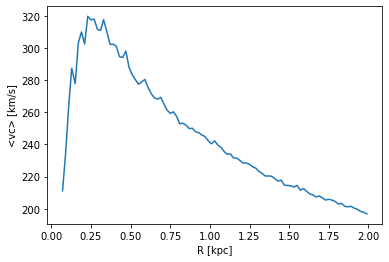

In [20]:
plt.plot(Rlist, vclist)
plt.xlabel('R [kpc]')
plt.ylabel('<vc> [km/s]')

Text(0, 0.5, 'vc [km/s]')

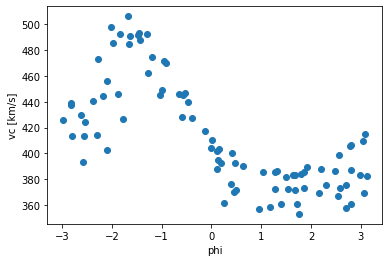

In [28]:
Rmin = 0.2
Rmax = Rmin + 0.02

key = np.logical_and(R > Rmin, R<Rmax)
key = np.logical_and(key, np.abs(pos[:,2]) < 0.1)
plt.scatter(phi[key], vc[key])
plt.xlabel('phi')
plt.ylabel('vc [km/s]')


In [42]:
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

In [35]:
key = R < 0.15
A6r = np.sum(mass[key] * np.cos(6*phi[key]))
A6i = np.sum(mass[key] * np.sin(6*phi[key]))
A6 = np.sqrt(A6r**2 + A6i**2)
A4r = np.sum(mass[key] * np.cos(4*phi[key]))
A4i = np.sum(mass[key] * np.sin(4*phi[key]))
A4 = np.sqrt(A4r**2 + A4i**2)
A2r = np.sum(mass[key] * np.cos(2*phi[key]))
A2i = np.sum(mass[key] * np.sin(2*phi[key]))
A2 = np.sqrt(A2r**2 + A2i**2)
A0 = np.sum(mass[key])
print(A2/A0)
print(A4/A0)
print(A6/A0)

0.46480025333885266
0.15463537978940164
0.0959834663641808


In [46]:
key = r < 0.1
Lang = np.cross(pos, vel)
Ltot = np.sum(Lang[key], axis=0)

In [47]:
print(Ltot)

[ 9763.46793257 23238.29699033 -4087.16236393]


### Jeans mass

In [7]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

In [61]:
import astropy.units as u
from astropy.constants import k_B

In [71]:
k_B.cgs

<Quantity 1.380649e-16 erg / K>

In [6]:
def Jeans(rho, T):
    gamma = 5./3.
    
    XH = 0.76
    mp = 1.672621911E-24
    xe = 0
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    UnitEnergy_in_cgs         = 1.989e+53
    UnitMass_in_g             = 1.989e+43
    
    kB = 1.381E-16
    G = 43018.7
    
    Jeans_length = np.sqrt((5*  kB*T)/(2*np.pi*(gamma-1)*mu*rho*G) / (UnitEnergy_in_cgs/UnitMass_in_g))
    Jeans_mass = (4*np.pi/3.) * rho * Jeans_length**3
    
    return Jeans_length, Jeans_mass

In [89]:
L, M = Jeans(sn0.part0.rho.value, 1E4)

In [91]:
M[key0]

array([2.0947350e-04, 1.4402052e-04, 9.4666299e-05, ..., 7.0223794e-04,
       5.5922900e-04, 4.0404350e-03], dtype=float32)

In [92]:
print(np.median(6E4/M[key0]/1E10))
print(np.max(6E4/M[key0]/1E10))

0.019752463
0.08319405


In [88]:
pos0 = sn0.part0.pos.value - center
vel0 = sn0.part0.vel.value
acc0 = sn0.part0.acce
mass0 = sn0.part0.mass.value

r = np.linalg.norm(pos0, axis=1)
R = np.linalg.norm(pos0[:,:2], axis=1)
phi = np.arctan2(pos0[:,1], pos0[:,0])

key0 = r < 0.1

In [93]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

Text(0.5, 1.0, '0 Myr')

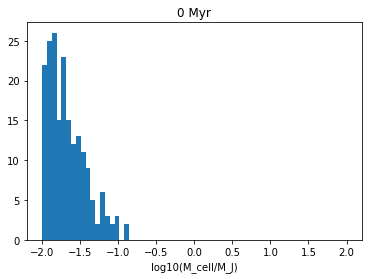

In [125]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 0, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.1

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-2, 2, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
plt.title('0 Myr')

Text(0.5, 1.0, 't=250 Myr')

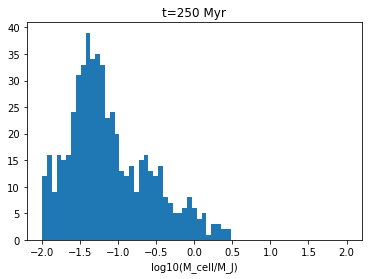

In [12]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4-SFE/output', 50, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.1

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-2, 2, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
plt.title('t=250 Myr')

Text(0.5, 1.0, 't=10 Myr')

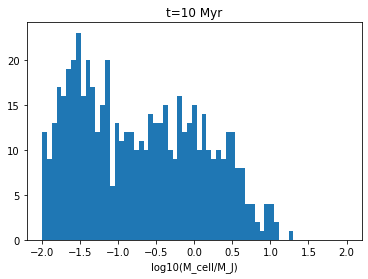

In [127]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 2, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.1

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-2, 2, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
plt.title('t=10 Myr')

Text(0.5, 1.0, 't=15 Myr')

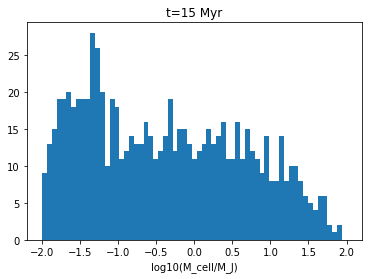

In [128]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 3, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.1

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-2, 2, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
plt.title('t=15 Myr')

Text(0.5, 1.0, 't=20 Myr')

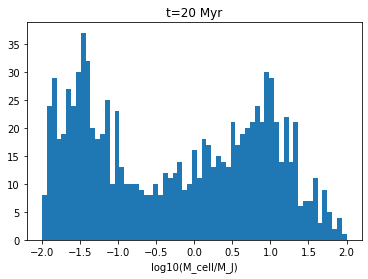

In [130]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 4, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.1

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-2, 2, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
# plt.yscale('log')
plt.title('t=20 Myr')

Text(0.5, 1.0, 't=25 Myr')

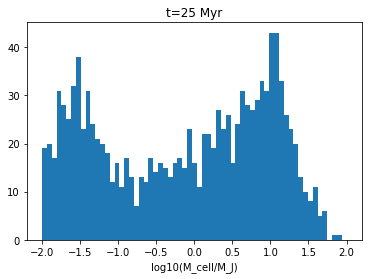

In [132]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 5, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.1

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-2, 2, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
# plt.yscale('log')
plt.title('t=25 Myr')

Text(0.5, 1.0, 't=250 Myr')

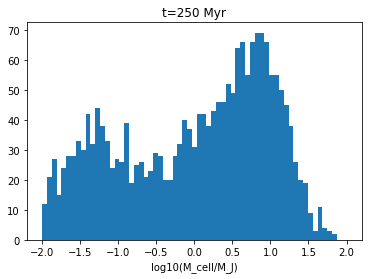

In [121]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 50, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.1

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-2, 2, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
plt.title('t=250 Myr')

Text(0.5, 1.0, 't=250 Myr')

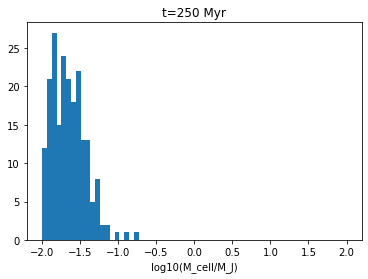

In [9]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 50, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value
sfr = sn.part0.sfr.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = np.logical_and(r < 0.1, sfr == 0)

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-2, 2, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
plt.title('t=250 Myr')

In [124]:
rat = mass[key]/M[key]
print(len(rat[rat > 1])/len(rat), len(rat[rat<1])/len(rat))

0.5414928140936486 0.4585071859063514


### phase diagram

In [1]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

def compute_n(sn):
    rho = np.copy(sn.part0.Density.value)
    xe  = sn.part0.ElectronAbundance
    # print(rho[rho>0])
    
    #convert rho to cgs
    UnitMass   = sn.parameters.UnitMass_in_g
    UnitLength = sn.parameters.UnitLength_in_cm
    rho *= UnitMass/UnitLength**3
    # print(UnitMass/UnitLength**3)
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    # print(np.median(mu))
    # print(np.where(np.isnan(rho[rho>0]))[0])
    # print(rho[:10])
    
    n = rho / mu
    
    return n
    

In [5]:
sn050 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl4/output', 50, combineFiles=True)

In [54]:
sn = sn050
center = sn.part1.pos.value[np.argmin(sn.part1.pot.value)]
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.15

In [40]:
n050 = compute_n(sn050)
T050 = compute_T(sn050)
m050 = sn050.part0.mass.value
rho050 = sn050.part0.rho.value

In [19]:
print(n050.shape, key.shape)

(34609,) (34609,)


[-6.0, 5.0, 1.0, 7.0]


[Text(0.5, 0, 'log n (cc)'), Text(0, 0.5, 'logT (K)')]

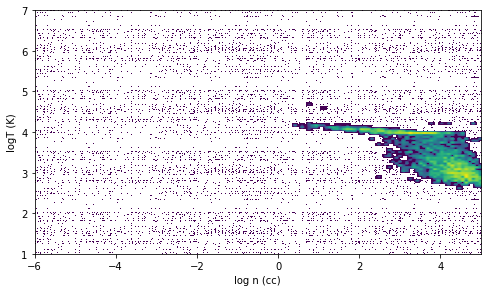

In [38]:
n = n050
T = T050
m = m050

rng = [[-6, 5], [1, 7]]

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n[key]), 
                                                  np.log10(T[key]), 
                                                  m[key], 
                                                  range = rng,
                                                  statistic='sum', bins=128)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]
print(extent)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# cmap=mpl.colormaps['viridis']
# cmap.set_bad(

ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=rng[0], ylim=rng[1])
ax.set(xlabel='log n (cc)', ylabel='logT (K)')


In [42]:
Jeans_L, Jeans_m = Jeans(rho050, T050)

[-6.0, 5.0, 1.0, 7.0]


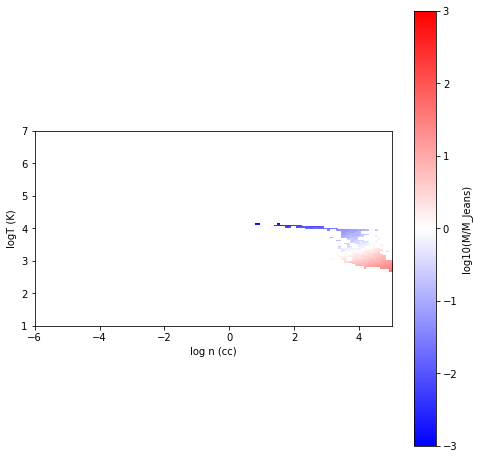

In [51]:
n = n050
T = T050
m = m050

rng = [[-6, 5], [1, 7]]

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n[key]), 
                                                  np.log10(T[key]), 
                                                  np.log10(m[key]/Jeans_m[key]), 
                                                  range = rng,
                                                  statistic='median', bins=128)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]
print(extent)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# cmap=mpl.colormaps['viridis']
# cmap.set_bad(

im = ax.imshow(m_in_bin.T, origin='lower', extent=extent, vmin=-3, vmax=3, cmap='bwr')
ax.set(xlim=rng[0], ylim=rng[1])
ax.set(xlabel='log n (cc)', ylabel='logT (K)')
fig.colorbar(im, ax=ax, label='log10(M/M_Jeans)')


### oriented disk

In [52]:
def compute_A2_angle(pos, mass):
    R = np.linalg.norm(pos[:,:2], axis=1)
    phi = np.arctan2(pos[:,1], pos[:,0])
    
    A2r = np.sum(mass * np.cos(2*phi))
    A2i = np.sum(mass * np.sin(2*phi))
    A2 = np.sqrt(A2r**2 + A2i**2)
    
    phi2 = 0.5 * np.arctan2(A2i, A2r)
    
    return A2, phi2

In [56]:
def rotate_pos(pos, ang):

    Rmat = np.array([[np.cos(ang), -np.sin(ang), 0.0],
                     [np.sin(ang),  np.cos(ang), 0.0],
                     [0.0,         0.0,          1.0]])
    
    pos = np.swapaxes(pos, 0, 1)
    pos = np.matmul(Rmat, pos)
    pos = np.swapaxes(pos, 0, 1)
    

    return pos

In [67]:
posc = pos + np.array([0., 0.05, 0])

In [71]:

A2, phi2 = compute_A2_angle(posc[key], mass[key])

In [72]:
pos_rot = rotate_pos(posc, -phi2)

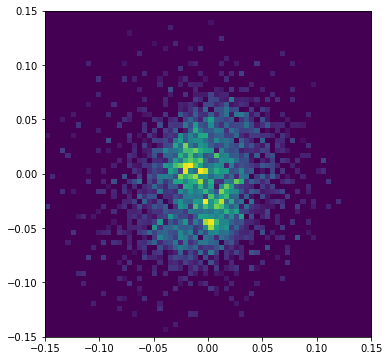

In [78]:
rng = [[-0.15, 0.15], [-0.15, 0.15]]
nres = 64

dx = (rng[0][1] - rng[0][0])/nres
dy = (rng[1][1] - rng[1][0])/nres
surf = dx * dy
    
heatmap, _, _ = np.histogram2d(pos_rot[key][:,0], pos_rot[key][:,2], 
                                   bins=(nres, nres), range=rng, weights=mass[key]/surf)
extent = [rng[0][0], rng[0][1], rng[1][0], rng[1][1]]

fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.imshow(heatmap.T, origin='lower', extent=extent)


[-0.15, 0.15, -0.15, 0.15]


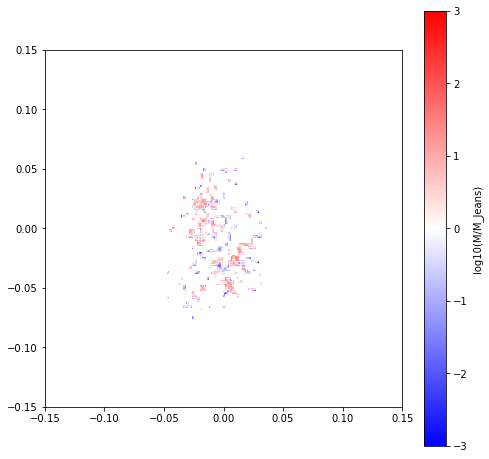

In [85]:
n = n050
T = T050
m = m050

rng = [[-0.15, 0.15], [-0.15, 0.15]]

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(pos_rot[key][:,0], 
                                                  pos_rot[key][:,2], 
                                                  np.log10(mass[key]/Jeans_m[key]), 
                                                  range = rng,
                                                  statistic='median', bins=128)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]
print(extent)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# cmap=mpl.colormaps['viridis']
# cmap.set_bad(

im = ax.imshow(m_in_bin.T, origin='lower', extent=extent, vmin=-3, vmax=3, cmap='bwr')
ax.set(xlim=rng[0], ylim=rng[1])
# ax.set(xlabel='log n (cc)', ylabel='logT (K)')
fig.colorbar(im, ax=ax, label='log10(M/M_Jeans)')


[-0.15, 0.15, -0.15, 0.15]


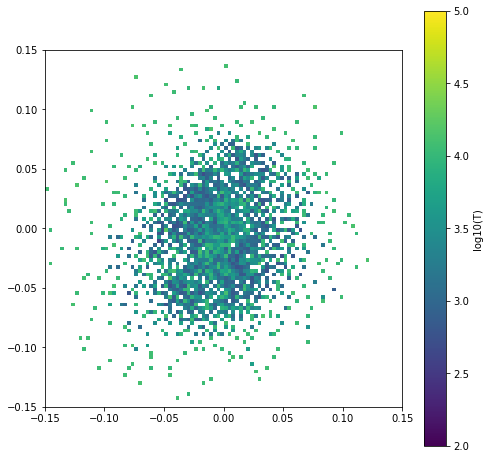

In [94]:
n = n050
T = T050
m = m050

rng = [[-0.15, 0.15], [-0.15, 0.15]]
vmin=2
vmax = 5

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(pos_rot[key][:,0], 
                                                  pos_rot[key][:,2], 
                                                  np.log10(T[key]), 
                                                  range = rng,
                                                  statistic='median', bins=96)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]
print(extent)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# cmap=mpl.colormaps['viridis']
# cmap.set_bad(

im = ax.imshow(m_in_bin.T, origin='lower', extent=extent, vmin=vmin, vmax=vmax)#, cmap='bwr')
ax.set(xlim=rng[0], ylim=rng[1])
# ax.set(xlabel='log n (cc)', ylabel='logT (K)')
fig.colorbar(im, ax=ax, label='log10(T)')


In [95]:
cell_volume = sn.part0.mass.value / sn.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

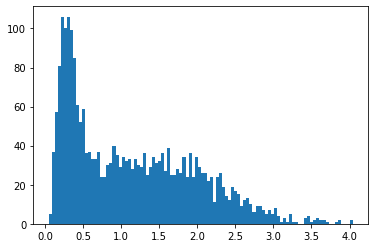

In [96]:
plt.hist(cell_size[key]/Jeans_L[key], bins=100);

### lvl3 jeans length

Text(0.5, 1.0, '125 Myr')

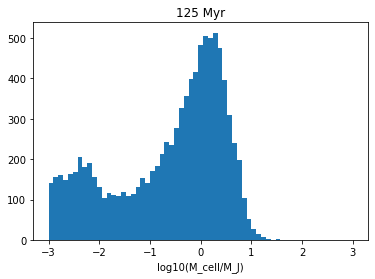

In [111]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0-newSMUGGLE/lvl3/output', 25, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value
rho = sn.part0.rho.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.15

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)
plt.hist(np.log10(mass[key]/M[key]), bins=np.linspace(-3, 3, 64));
# plt.yscale('log')
plt.xlabel('log10(M_cell/M_J)')
plt.title('125 Myr')

In [104]:
cell_volume = sn.part0.mass.value / sn.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

Text(0.5, 0, 'cell size / Jeans length')

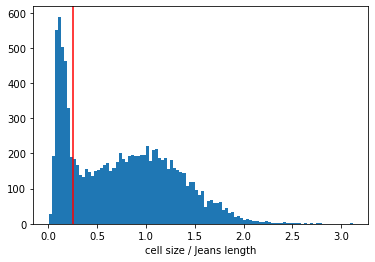

In [109]:
plt.hist(cell_size[key]/L[key], bins=100);
plt.axvline(0.25, c='r')
plt.xlabel('cell size / Jeans length')

[Text(0.5, 0, 'cell_size/Jeans length'),
 Text(0, 0.5, 'log10(dens) [1E10Msun/kpc^3]')]

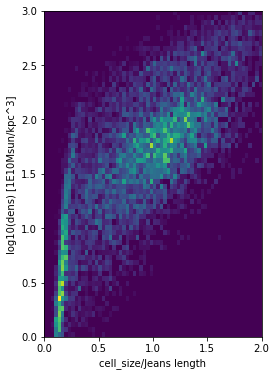

In [119]:
rng = [[0, 2], [0, 3]]
nres = 64

dx = (rng[0][1] - rng[0][0])/nres
dy = (rng[1][1] - rng[1][0])/nres
surf = dx * dy
    
heatmap, _, _ = np.histogram2d(cell_size[key]/L[key], np.log10(rho[key]), 
                                   bins=(nres, nres), range=rng, weights=mass[key]/surf)
extent = [rng[0][0], rng[0][1], rng[1][0], rng[1][1]]

fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.imshow(heatmap.T, origin='lower', extent=extent)
ax.set(xlabel='cell_size/Jeans length', ylabel='log10(dens) [1E10Msun/kpc^3]')


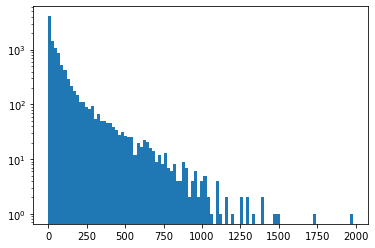

In [117]:
plt.hist(rho[key], bins=100);
plt.yscale('log')